# Predictions based on fifth vector - v5

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Features:

* Age
* TMV (Total Market Value)
* Forma (zwycięstwa/przegrane) z ostatnich 3 meczów
* Forma (zwycięstwa/przegrane) z ostatnich 5 meczów 
* Ważona średnia liczba oddanych strzałów z ostatnich 3 meczów
* Ważona średnia liczba oddanych strzałów z ostatnich 5 meczów
* Ważona średnia liczba strzałów na bramkę z ostatnich 3 meczów
* Ważona średnia liczba strzałów na bramkę z ostatnich 5 meczów
* Ważona średnia liczba goli w ostatnich 3 meczach
* Ważona średnia liczba goli w ostatnich 5 meczach

In [2]:
model_data = pd.read_csv('learning_vectors/v05/version5-complete.csv', sep=',')

model_data = model_data.set_index(['Match_id'])
model_data = model_data.sort_values(['League_id', 'Date'])
model_data.columns = [
    'League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
    'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
    'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth',
    'H_age', 'A_age',
    'H_TMV', 'A_TMV',
    'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST',
    'H_Form03', 'A_Form03',
    'H_Form05', 'A_Form05',
    'H_MeanShots03', 'A_MeanShots03',
    'H_MeanShots05', 'A_MeanShots05',
    'H_MeanShotsOnTarget03', 'A_MeanShotsOnTarget03',
    'H_MeanShotsOnTarget05', 'A_MeanShotsOnTarget05',
    'H_MeanFullTimeGoals03', 'A_MeanFullTimeGoals03',
    'H_MeanFullTimeGoals05', 'A_MeanFullTimeGoals05',
    'H_WeightedMeanShots03', 'A_WeightedMeanShots03',
    'H_WeightedMeanShots05', 'A_WeightedMeanShots05',
    'H_WeightedMeanShotsOnTarget03', 'A_WeightedMeanShotsOnTarget03',
    'H_WeightedMeanShotsOnTarget05', 'A_WeightedMeanShotsOnTarget05',
    'H_WeightedMeanFullTimeGoals03', 'A_WeightedMeanFullTimeGoals03',
    'H_WeightedMeanFullTimeGoals05', 'A_WeightedMeanFullTimeGoals05'
]

print(model_data.shape)
# model_data.head()


(6080, 61)


## Different algorithms comparison

In [3]:
features = [
    'H_age', 'A_age',
    'H_TMV', 'A_TMV',
    'H_Form03', 'A_Form03',
    'H_Form05', 'A_Form05',
    'H_WeightedMeanShots03', 'A_WeightedMeanShots03',
    'H_WeightedMeanShots05', 'A_WeightedMeanShots05',
    'H_WeightedMeanShotsOnTarget03', 'A_WeightedMeanShotsOnTarget03',
    'H_WeightedMeanShotsOnTarget05', 'A_WeightedMeanShotsOnTarget05',
    'H_WeightedMeanFullTimeGoals03', 'A_WeightedMeanFullTimeGoals03',
    'H_WeightedMeanFullTimeGoals05', 'A_WeightedMeanFullTimeGoals05'
]

ALGS = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

print(model_data[features].shape)
model_data[features].head()


(6080, 20)


,H_age,A_age,H_TMV,A_TMV,H_Form03,A_Form03,H_Form05,A_Form05,H_WeightedMeanShots03,A_WeightedMeanShots03,H_WeightedMeanShots05,A_WeightedMeanShots05,H_WeightedMeanShotsOnTarget03,A_WeightedMeanShotsOnTarget03,H_WeightedMeanShotsOnTarget05,A_WeightedMeanShotsOnTarget05,H_WeightedMeanFullTimeGoals03,A_WeightedMeanFullTimeGoals03,H_WeightedMeanFullTimeGoals05,A_WeightedMeanFullTimeGoals05
Match_id,,,,,,,,,,,,,,,,,,,,
1730,21.3,24.6,250.0,64.0,4,1,7,1,27.578947,15.578947,19.617647,11.823529,15.578947,7.368421,11.558824,5.058824,2.842105,1.315789,2.000000,0.735294
1731,24.9,23.9,91.0,257.0,0,6,3,12,7.842105,23.210526,8.000000,17.882353,3.473684,11.473684,4.235294,9.529412,0.000000,1.421053,0.558824,1.764706
1732,24.3,25.7,80.0,61.0,4,3,5,5,15.263158,19.000000,13.558824,17.264706,8.052632,9.052632,8.058824,9.176471,1.473684,1.368421,1.029412,1.117647
1734,24.4,26.4,162.0,86.0,6,4,10,4,14.263158,16.894737,13.088235,13.911765,7.631579,10.263158,6.941176,7.764706,1.947368,3.368421,1.882353,2.058824
1735,22.3,22.5,73.0,212.0,7,4,11,7,14.368421,11.842105,13.058824,10.735294,9.631579,7.157895,7.558824,6.382353,2.421053,3.263158,1.941176,2.411765


### Basic compraison: 

Alg/res.mean/res.std
LR: 0.531414 (0.006248)
LDA: 0.532237 (0.009635)
KNN: 0.481250 (0.011014)
CART: 0.417270 (0.018870)
NB: 0.478783 (0.003790)
SVM: 0.474507 (0.001939)


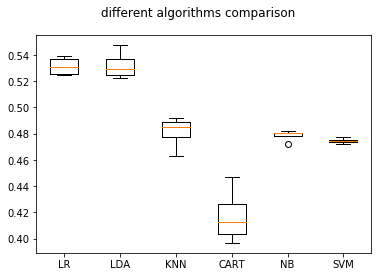

In [4]:
X = model_data[features]
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Basic comparison with preprocessing:

Alg/res.mean/res.std
LR: 0.533882 (0.005930)
LDA: 0.533717 (0.009504)
KNN: 0.465789 (0.017622)
CART: 0.422039 (0.012668)
NB: 0.481414 (0.009561)
SVM: 0.532895 (0.002182)


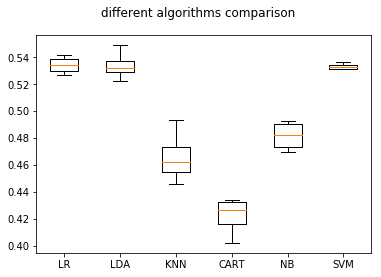

In [5]:
X = preprocessing.scale(model_data[features])
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
